In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("data/Pizza_Sales.xlsx")

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Conversion des dates pour avoir les noms de mois

In [4]:
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.loc[(df['order_month'] ==1), 'order_month'] = 'January'
df.loc[(df['order_month'] ==2), 'order_month'] = 'February'
df.loc[(df['order_month'] ==3), 'order_month'] = 'March'
df.loc[(df['order_month'] ==4), 'order_month'] = 'April'
df.loc[(df['order_month'] ==5), 'order_month'] = 'May'
df.loc[(df['order_month'] ==6), 'order_month'] = 'June'
df.loc[(df['order_month'] ==7), 'order_month'] = 'July'
df.loc[(df['order_month'] ==8), 'order_month'] = 'August'
df.loc[(df['order_month'] ==9), 'order_month'] = 'September'
df.loc[(df['order_month'] ==10), 'order_month'] = 'October'
df.loc[(df['order_month'] ==11), 'order_month'] = 'November'
df.loc[(df['order_month'] ==12), 'order_month'] = 'December'



C:\Users\barce\AppData\Local\Temp\ipykernel_22840\3366555774.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'January' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df['order_month'] ==1), 'order_month'] = 'January'


Les 5 pizzas les plus vendues et les 5 les moins vendues

In [5]:
pizzas = (
    df.groupby(["order_month", "pizza_name"]) 
    .size()                                   
    .reset_index(name="sales")                
    .sort_values(["order_month", "sales"], ascending=[True, False])                     
)

top_pizzas=(
    pizzas.groupby("order_month")  
    .apply(lambda x: x.head(5))
    .reset_index(drop=True)
)

bottom_pizzas=(
    pizzas.groupby("order_month")  
    .apply(lambda x: x.tail(5))
    .reset_index(drop=True)
)

top_filtered_df = df.merge(top_pizzas[["order_month", "pizza_name"]], on=["order_month", "pizza_name"])
bottom_filtered_df = df.merge(bottom_pizzas[["order_month", "pizza_name"]], on=["order_month", "pizza_name"])



Tracé des 5 pizzas les plus vendues et des 5 les moins vendues par mois

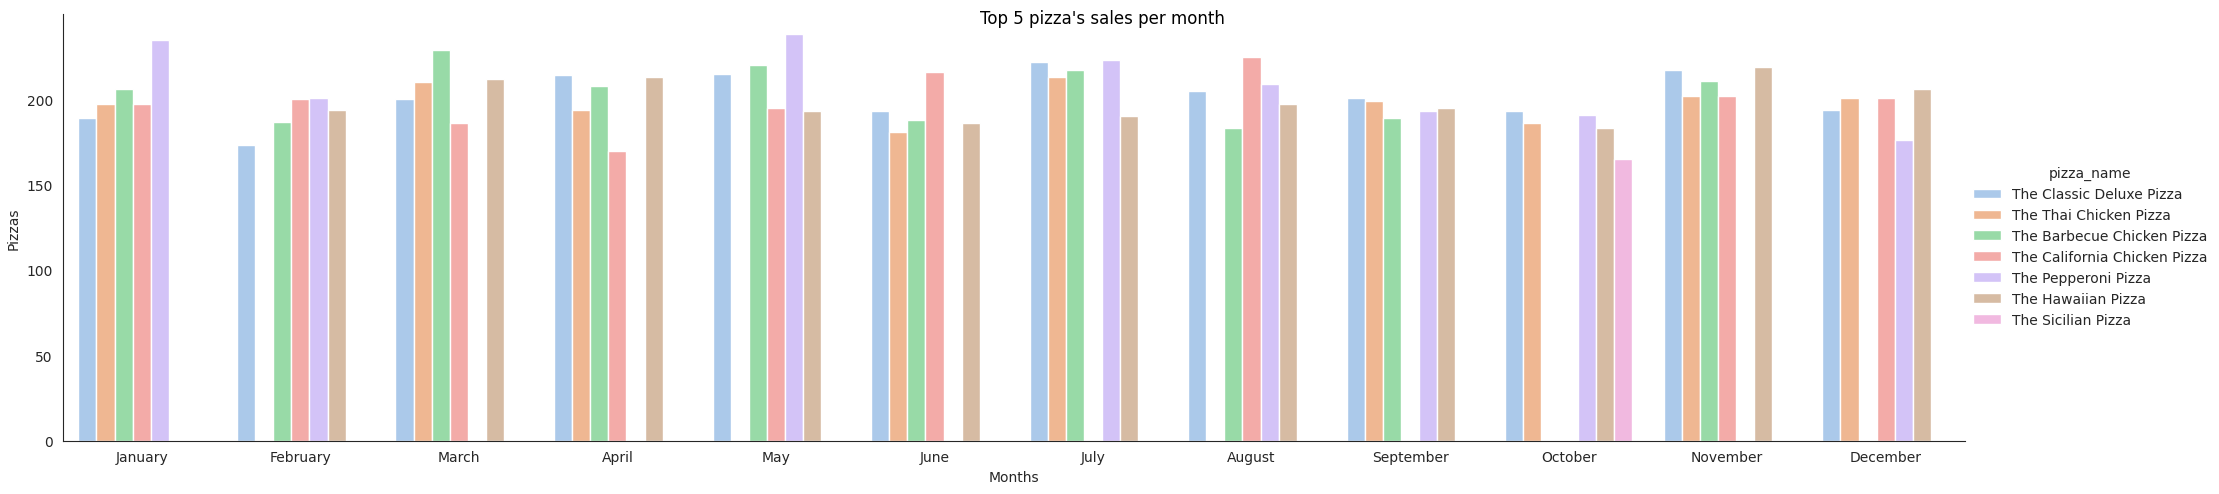

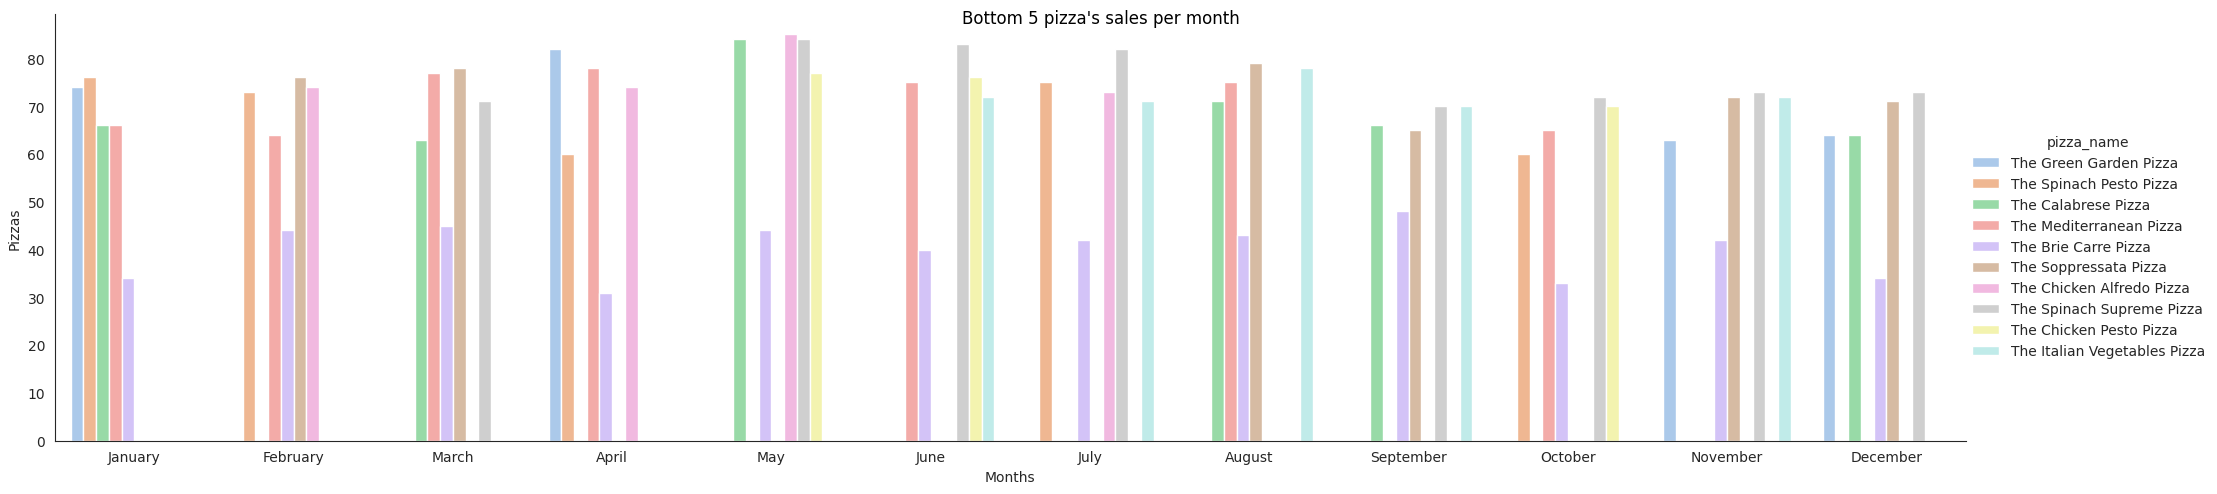

In [6]:
with sns.axes_style('white'):
    g = sns.catplot(x="order_month", data=top_filtered_df, aspect=4.0, kind='count',hue='pizza_name',palette="pastel")
g.set_ylabels('Pizzas')
g.set_xlabels("Months")
g.fig.suptitle("Top 5 pizza's sales per month")
plt.show()



with sns.axes_style('white'):
    g = sns.catplot(x="order_month", data=bottom_filtered_df, aspect=4.0, kind='count',hue='pizza_name',palette="pastel")
g.set_ylabels('Pizzas')
g.set_xlabels("Months")
g.fig.suptitle("Bottom 5 pizza's sales per month")
plt.show()

Transformation mois en ordre chronologique

In [7]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

pizzas['order_month'] = pd.Categorical(pizzas['order_month'], 
                                             categories=month_order, 
                                             ordered=True)

Tracé des ventes de pizzas au fil de l'année

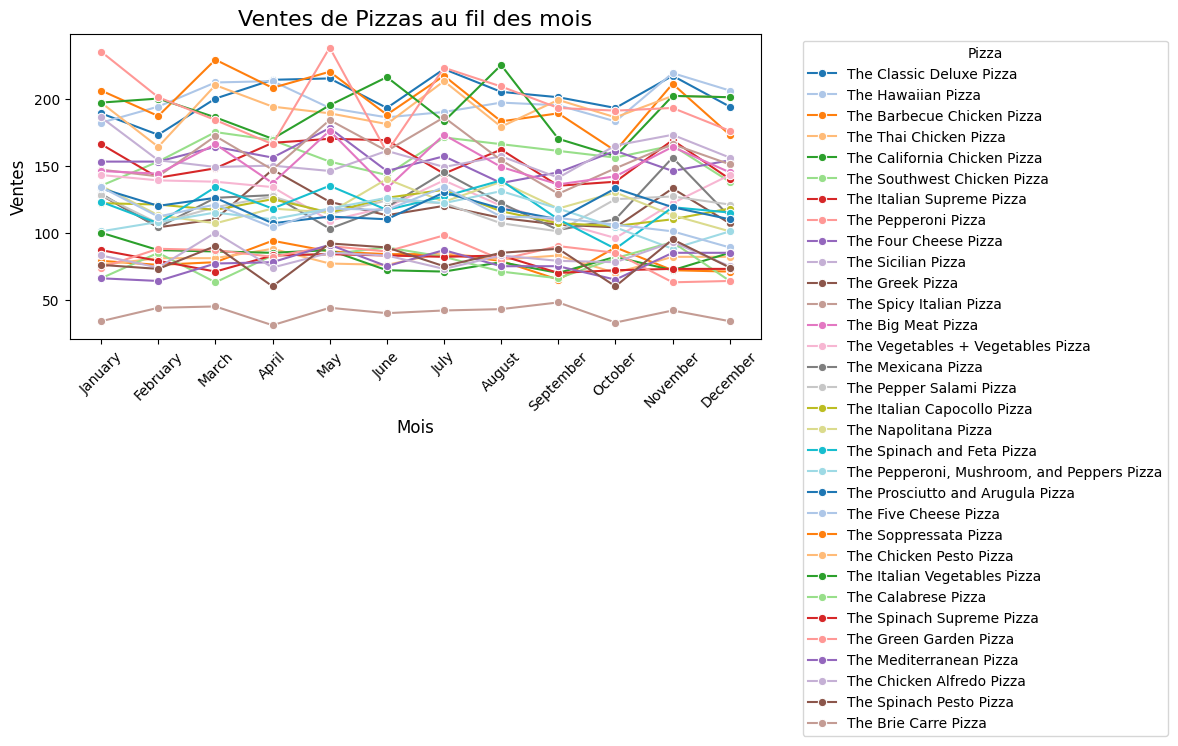

In [8]:
plt.figure(figsize=(12, 6))

palette = sns.color_palette("tab20", n_colors=pizzas['pizza_name'].nunique())
sns.lineplot(data=pizzas, x='order_month', y='sales', hue='pizza_name', marker='o',palette=palette)

plt.title('Ventes de Pizzas au fil des mois', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Pizza', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
pizza_count = df.groupby("pizza_name").size().sort_values(ascending=False)
print(pizza_count)

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     